In [1]:
#Polinomial linear regression
# y = a + bx + cx^2 + ... + nx^n + ...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset = dataset.drop(['Position'], axis = True) # yazı olan kısım bizi ilgilendirmiyor silebiliriz

In [6]:
dataset.info

<bound method DataFrame.info of    Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000>

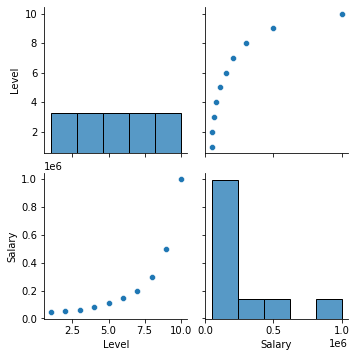

In [7]:
sns.pairplot(dataset)

In [8]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((8, 1), (2, 1), (8,), (2,))

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [12]:
print('Training accuracy', lin_reg.score(Xtrain,ytrain))#başarı oranını hesaplama
print('Training accuracy', lin_reg.score(Xtest,ytest))

Training accuracy 0.6366049276570868
Training accuracy 0.8451346684575975


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(Xtrain)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, ytrain)
X_poly_test= poly_reg.transform(Xtest)

In [14]:
print('Training accuracy', lin_reg2.score(X_poly,ytrain))#başarı oranını hesaplama
print('Training accuracy', lin_reg2.score(X_poly_test,ytest))

Training accuracy 0.9995857211026754
Training accuracy 0.9714666803841844


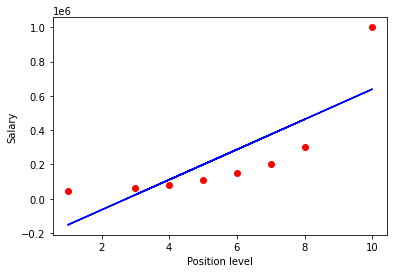

In [15]:
plt.scatter(Xtrain.values, ytrain.values, color= 'red')
plt.plot(Xtrain.values, lin_reg.predict(Xtrain), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

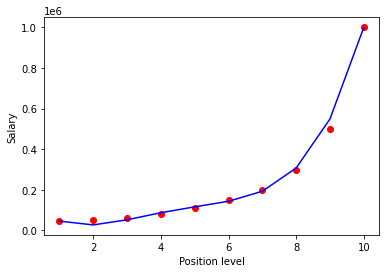

In [16]:
plt.scatter(X.values, y.values, color= 'red')
plt.plot(X.values, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue') #Polinomical çıktı alma
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [17]:
#Multiple linear regression
# y = b0 + b1*x1 + b2*x2 + .... + bn*xn

In [18]:
dataset = pd.read_csv('50_Startups.csv')

In [19]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


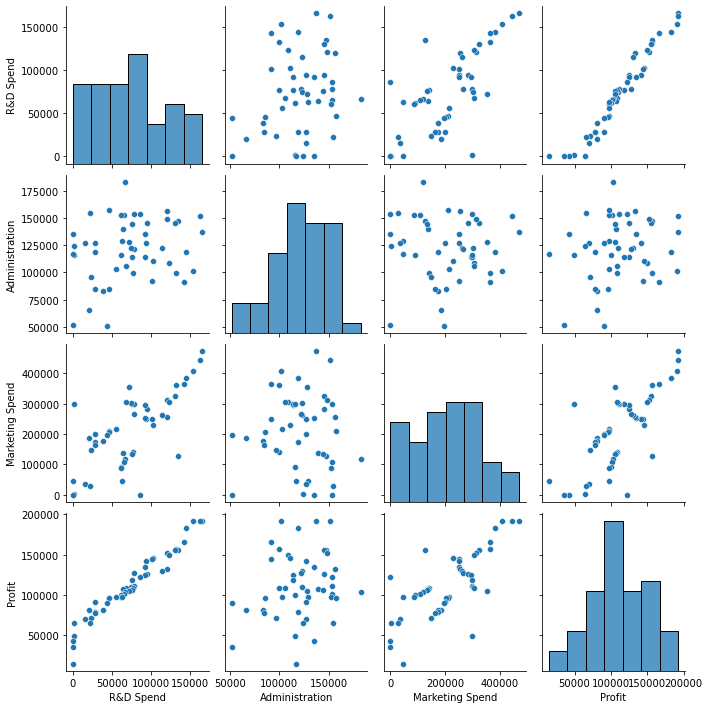

In [20]:
sns.pairplot(dataset)

In [21]:
dataset = dataset.drop(['State'], axis = True)

In [22]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

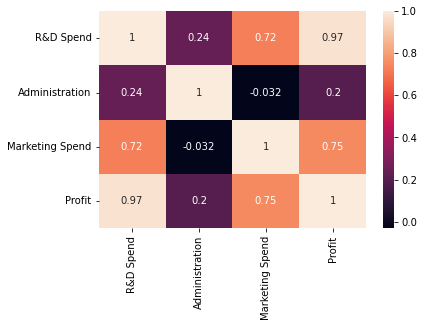

In [23]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

In [24]:
X = dataset.drop(['Profit'], axis = True)
y = dataset['Profit']

In [25]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [26]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [28]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [30]:
Xtrain.shape, Xtest.shape,ytrain.shape,ytest.shape

((40, 3), (10, 3), (40,), (10,))

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [32]:
ypred = lin_reg.predict(Xtest).round(1)

In [33]:
hesaplama = pd.DataFrame(np.c_[ytest,ypred], columns = ['Original Profit','Predicted Profit'])
hesaplama.head()

,Original Profit,Predicted Profit
0,134307.35,126703.0
1,81005.76,84894.8
2,99937.59,98893.4
3,64926.08,46501.7
4,125370.37,129128.4


In [34]:
print('Training accuracy', lin_reg.score(Xtrain,ytrain))#başarı oranını hesaplama
print('Training accuracy', lin_reg.score(Xtest,ytest))

Training accuracy 0.9535927757257411
Training accuracy 0.900065308303732


In [35]:
feature = [165349.20,136897.80,471784.10]
scale_feature = sc.transform([feature])
scale_feature

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2.01641149, 0.56075291, 2.15394309]])

In [36]:
ypredtest = lin_reg.predict(scale_feature)
ypredtest

array([192416.0460853])

In [37]:
#Gradient Descent

In [38]:
plt.rcParams['figure.figsize'] = (10,5)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [39]:
cols = ['a','b']
dataset = pd.read_csv('data.csv', header = None, names = cols)

In [40]:
dataset.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [41]:
x = dataset.drop('b', axis= True)
y = dataset['b']

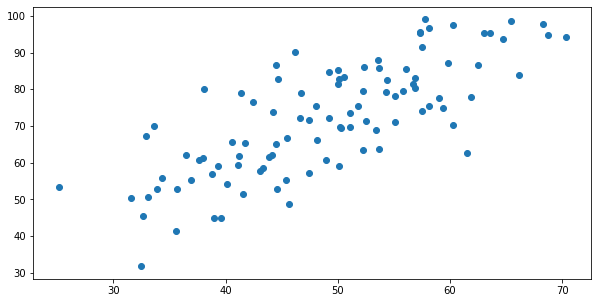

In [42]:
plt.scatter(x,y)
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [44]:
ypredlr = lr.predict(x)

In [45]:
print('Intercept',lr.intercept_)
print('Coefficient', lr.coef_[0])

Intercept 13.642154681481571
Coefficient 1.1927057602312432


In [46]:
X = dataset.iloc[:,0]
Y = dataset.iloc[:,1]

In [47]:
m = 0
c = 0
L = 0.0001
epochs = 1000
n = float(len(X))

for i in range(epochs):
    Ypred = m*X+c
    D_m = (-2/n) * sum(X*(Y-Ypred))
    D_c = (-2/n) * sum(Y-Ypred)
    m = m - L * D_m
    c = c - L * D_c

print('Intercept', m)
print('Coefficient', c)
    

Intercept 1.4582620978635645
Coefficient 0.13106568099591231


In [48]:
Ypred = m*X +c

----------Gardiyan inişsiz durum--------------


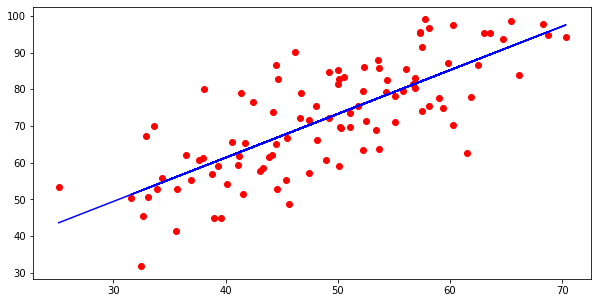

----------Gardiyan inişli durum---------------


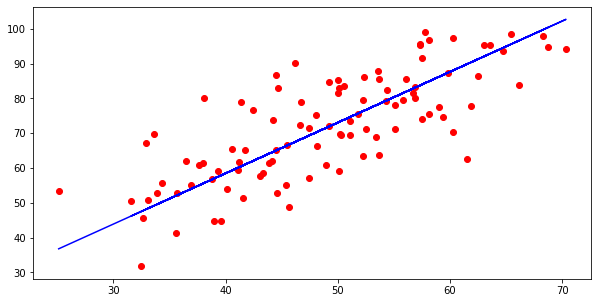

In [49]:
print('----------Gardiyan inişsiz durum--------------')
plt.scatter(x.values,y.values,color='red')
plt.plot(x.values,lr.predict(x),color='blue')
plt.show()

print('----------Gardiyan inişli durum---------------')
plt.scatter(X,Y,color= 'red')
plt.plot(X,Ypred,color = 'blue')
plt.show()

In [50]:
#Logistic Regression

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [53]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [54]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [55]:
X.shape, y.shape

((400, 2), (400,))

In [56]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size = 0.25, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(Xtrain,ytrain)

LogisticRegression()

In [59]:
ypred = classifier.predict(Xtest)

In [60]:
hesaplama = pd.DataFrame(np.c_[ytest,ypred],columns = ['Original Purchased', 'Predict Purchased'])
hesaplama

,Original Purchased,Predict Purchased
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
95,0,0
96,1,1
97,0,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


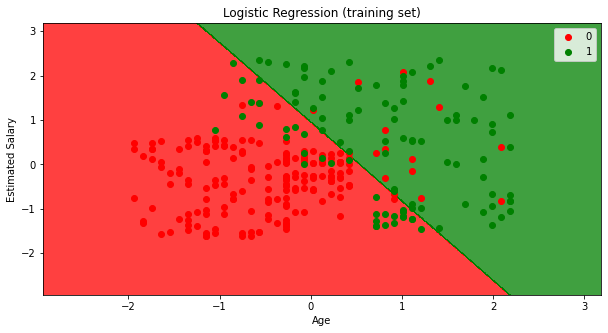

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = Xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


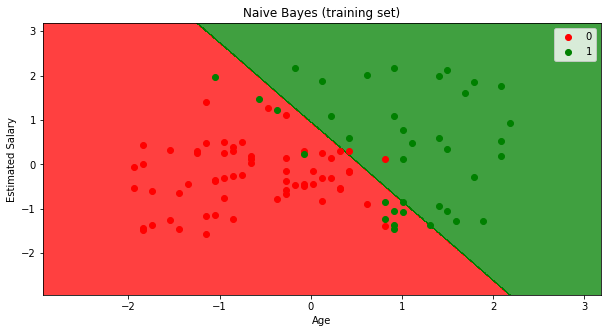

In [62]:
from matplotlib.colors import ListedColormap# Çizim için kullandığımız hazır fonksiyon
X_set, y_set = Xtest, ytest
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [63]:
"""
Support vector Machines
"""

'\nSupport vector Machines\n'